In [31]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt

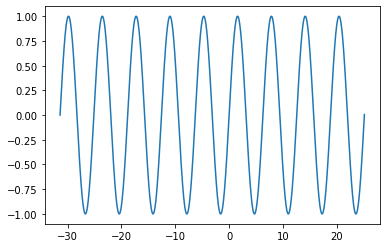

In [147]:
inputs = np.array(np.linspace(-10*pi, 10*pi, 10000))
inputs = inputs.reshape(len(inputs), 1)

train_x = inputs[:9001]
train_y = np.sin(train_x)

test_x = inputs[9000:]
test_y = np.sin(test_x)

plt.plot(train_x, train_y)

In [154]:
class Dense(object):
    @staticmethod
    def linear(x: np.array, deriv=False):
        if deriv:
            return np.ones_like(x)
        return x
        
    def __init__(self, *, neurons: int, inputs: int, activation='relu'):
        self.neurons_num = neurons
        self.inputs_num = inputs
        self.weights = np.random.randn(inputs, neurons)
        self.biases = np.random.randn(1, neurons)
        
    def forward(self, inputs):
        self.values = inputs @ self.weights + self.biases
        self.outputs = self.linear(x=self.values)
        return self.outputs
    
    def backward(self, dvalues, next_layers: list):
        
        print(self.linear(self.values, deriv=True))
        

class NeuralNetwork(object):
    def __init__(self, layers: list, learning_rate=0.001):
        self.layers = layers
        self.learning_rate = learning_rate
        
    @staticmethod
    def l2loss(predicted, targets, deriv=False):
        if deriv:
            # Check!!
            return 2 * np.sum(predicted, axis=1, keepdims=True)
        return np.sum( np.power(targets - predicted, 2) )
        
    def predict(self, inputs: np.array):
        """Predict the outputs for given inputs"""
        value = inputs.copy()
        
        for layer in self.layers:
            value = layer.forward(value)
            
        return value
    
    def validate(self, predictions, targets, verbose=True):
        """Validate predicted against targets"""
        loss = self.l2loss(predictions, targets)
        if verbose:
            print(f'MSE: {loss:.5f}')
        return loss
    
    def forward(self, inputs, targets, verbose=True):
        """Perform forward pass"""
        self.values = self.predict(inputs)
        self.targets = targets
        
        loss = self.validate(self.values, targets, verbose)
        
    def backward(self):
        """Perform backward pass"""
        loss_deriv = self.l2loss(self.values, self.targets, deriv=True).T
        for layer in self.layers:
            layer.backward(dvalues=loss_deriv, next_layers=self.layers[1:])

In [155]:
network = NeuralNetwork(
    layers=[
        Dense(neurons=2, inputs=1),
        Dense(neurons=3, inputs=2),
        Dense(neurons=2, inputs=3),
        Dense(neurons=1, inputs=2)
    ]
)
network.forward(train_x, train_y)
network.backward()

MSE: 6744788.65226
[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
